In [36]:
import warnings
warnings.filterwarnings("ignore")

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Task

From a data perspective, our objective is to analyze the provided used car dataset to identify the key features that significantly influence car prices. This involves formulating predictive models—specifically, using regression analysis( this a regression problem ) to model the relationship between car attributes (such as make, model, year, mileage, condition, and other relevant features) and their market prices. By applying statistical techniques and supervised machine learning algorithms, we aim to quantify the impact of each variable on the car's price, thus determining the primary factors that drive used car pricing.

##### Objectives
1. Understand the relationship between various features and used car market prices.
2. Build and evaluate multiple regression models to predict used car market prices.
3. Provide actionable insights based on model findings.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the dataset and identify potential quality issues, we will do the following steps:
1. Display basic information about the dataset
2. Display descriptive statistics
3. Check for missing values
4. Visualize the distribution of the target variable (price)
5. Create box plots to detect outliers of target variable (price)
6. Visualize correlations between features
7. Create histograms for certain features to understand their distribution
8. Analyze the relationship between categorical features and the target variable
9. Explore the geographical distribution of listings and the distribution of manufacturers


#### Data Dictionary

The dataset contains details about car listings across various regions, including attributes like price, condition, and specifications.

1. **id**: Unique identifier for each listing.

2. **region**: The region where the listing is located, generally represented as a city or metropolitan area.

3. **price**: The price of the car in USD.

4. **year**: The manufacturing year of the vehicle.

5. **manufacturer**: The manufacturer or brand of the vehicle (e.g., Ford, Toyota).

6. **model**: The specific model of the car (e.g., Camry, Civic).

7. **condition**: The condition of the car as specified by the seller (e.g., new, like new, excellent, good, fair, salvage).

8. **cylinders**: The number of cylinders in the engine (e.g., 4-cylinder, 6-cylinder).

9. **fuel**: The type of fuel the car uses (e.g., gasoline, diesel, electric, hybrid).

10. **odometer**: The mileage of the vehicle, recorded in miles.

11. **title_status**: The status of the vehicle's title (e.g., clean, salvage, rebuilt, lien).

12. **transmission**: The type of transmission the vehicle has (e.g., automatic, manual, other).

13. **VIN**: Vehicle Identification Number, a unique code used to identify individual motor vehicles.

14. **drive**: The type of drivetrain (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

15. **size**: The size category of the vehicle (e.g., compact, mid-size, full-size).

16. **type**: The body type of the car (e.g., sedan, SUV, truck, coupe).

17. **paint_color**: The color of the vehicle's exterior paint.

18. **state**: The state where the listing originates from, represented as a two-letter abbreviation (e.g., CA, NY).


In [37]:
#Auto reload is used to ensure changes made to utils show up immediatly
%load_ext autoreload
%autoreload 2

#Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Display the last few rows of the dataset because the first few rows are not usefule
print("\nLast few rows of the dataset:")
vehicles_df.tail()



Last few rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [39]:
#1. Display basic information about the dataset
print("Dataset info:")
vehicles_df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

In [40]:

#2. Display descriptive statistics
print("\nSummary statistics of features:")
vehicles_df.describe()




Summary statistics of features:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [41]:
#3. Check for missing values
from utils.data_understanding_helpers import analyze_missing_values

analyze_missing_values(vehicles_df)


Missing Values Analysis:
+--------------+------------+------------+
| Feature      |   #Missing | %Missing   |
+==============+============+============+
| id           |          0 | 0.00%      |
+--------------+------------+------------+
| region       |          0 | 0.00%      |
+--------------+------------+------------+
| price        |          0 | 0.00%      |
+--------------+------------+------------+
| year         |       1205 | 0.28%      |
+--------------+------------+------------+
| manufacturer |      17646 | 4.13%      |
+--------------+------------+------------+
| model        |       5277 | 1.24%      |
+--------------+------------+------------+
| condition    |     174104 | 40.79%     |
+--------------+------------+------------+
| cylinders    |     177678 | 41.62%     |
+--------------+------------+------------+
| fuel         |       3013 | 0.71%      |
+--------------+------------+------------+
| odometer     |       4400 | 1.03%      |
+--------------+------------

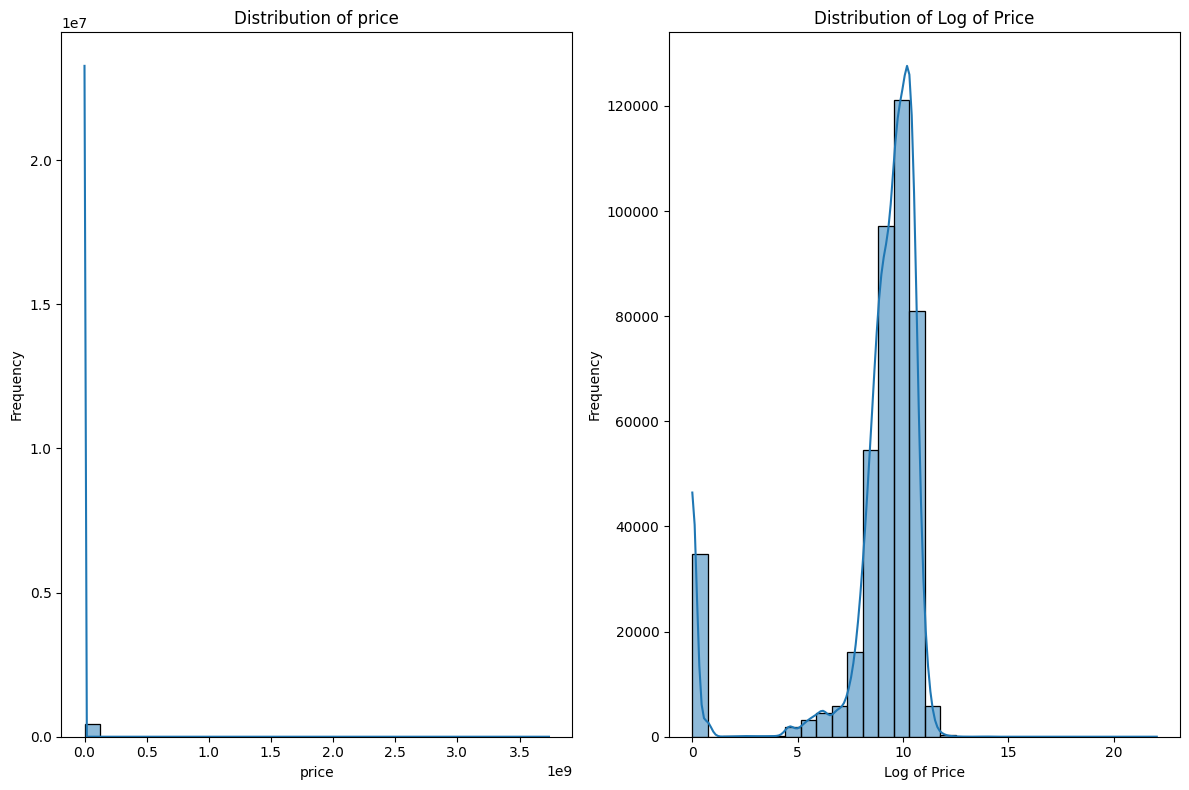

In [42]:

#4. Visualize the distribution of the target variable (price)
# #We see that the data is skewed to the left, and does not appear to be nomrally distributed. 
# This is better seen by plotting the log of the price.

from utils.data_understanding_helpers import plot_histograms

price = vehicles_df['price']
log_price = np.log1p(price)
log_price.name ='Log of Price'
plot_histograms([price, log_price])


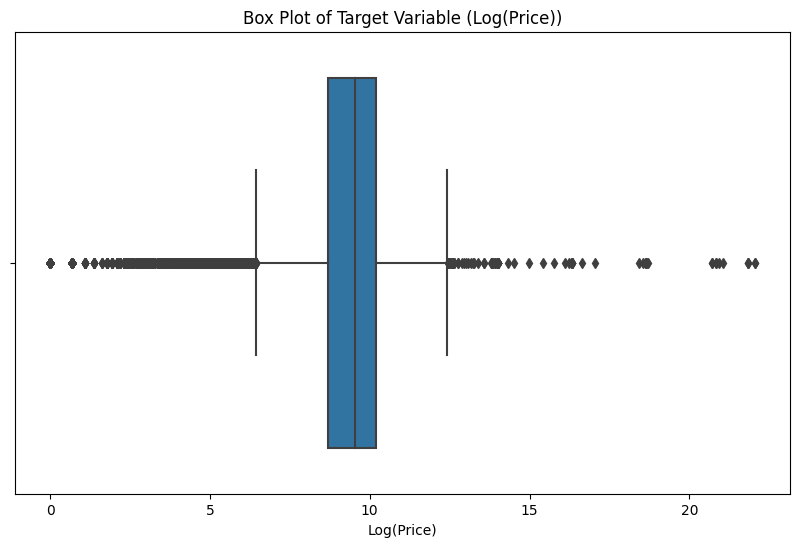

Number of outliers: 21


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,zscore_price
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al,81.066935
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al,8.202479
29386,7305265540,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,NaN,rwd,full-size,pickup,white,ca,91.201074
37409,7314053169,modesto,1111111111,2020.0,jeep,NaN,NaN,NaN,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca,91.201074
37410,7314052904,modesto,3009548743,2021.0,chevrolet,NaN,NaN,8 cylinders,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca,247.037216
91576,7309730903,delaware,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,de,248.300818
122470,7315836487,atlanta,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,9999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ga,81.066935
137807,7314339777,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,NaN,fwd,full-size,sedan,white,id,10.127966
153082,7305153975,indianapolis,1234567890,2006.0,volvo,vnl,fair,NaN,other,200000.0,clean,manual,NaN,NaN,NaN,NaN,black,in,101.335211
184704,7304345156,frederick,1410065407,1989.0,jeep,wrangler,NaN,NaN,diesel,103000.0,clean,manual,NaN,NaN,NaN,SUV,NaN,md,115.741192


In [43]:
# 5. Create box plots to detect outliers of target variable (price)
from utils.data_understanding_helpers import find_outliers

#Create a log box plot of price to better visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=(np.log1p(vehicles_df['price'].dropna())))
plt.title('Box Plot of Target Variable (Log(Price))')
plt.xlabel('Log(Price)')
plt.show()

outliers = find_outliers(vehicles_df, ['price'], 2)
print(f"Number of outliers: {len(outliers)}")
outliers



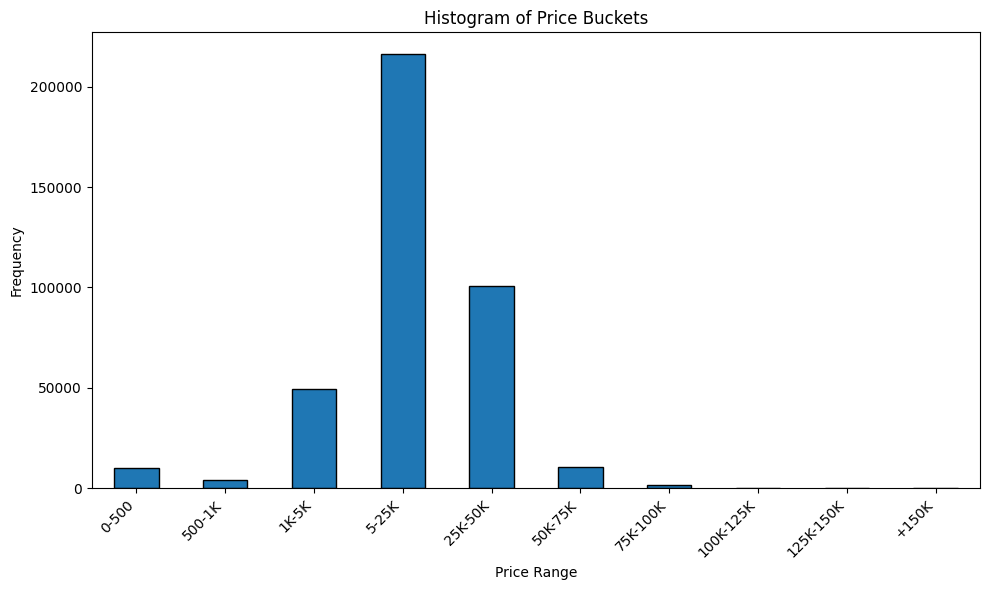

In [44]:
# Create a histogram of prices
bins = [0, 500, 1000, 5000, 25000, 50000, 75000, 100000, 125000, 150000, 1_000_000]
labels = ['0-500','500-1K', '1K-5K', '5-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '+150K']

# Create a new column 'price_bucket' based on the defined bins
price_bucket= pd.cut(vehicles_df['price'], bins=bins, labels=labels)

# Create the histogram based on the 'price_bucket' column
plt.figure(figsize=(10, 6))
price_bucket.value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.title('Histogram of Price Buckets')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Findings: 
- There are 21 outliers in the dataset that are signfiicantly skewing the data.
- The overall distribution looks skewed, with more outliers on the lower side than the upper, suggesting a possible negative skewness in the price distribution.

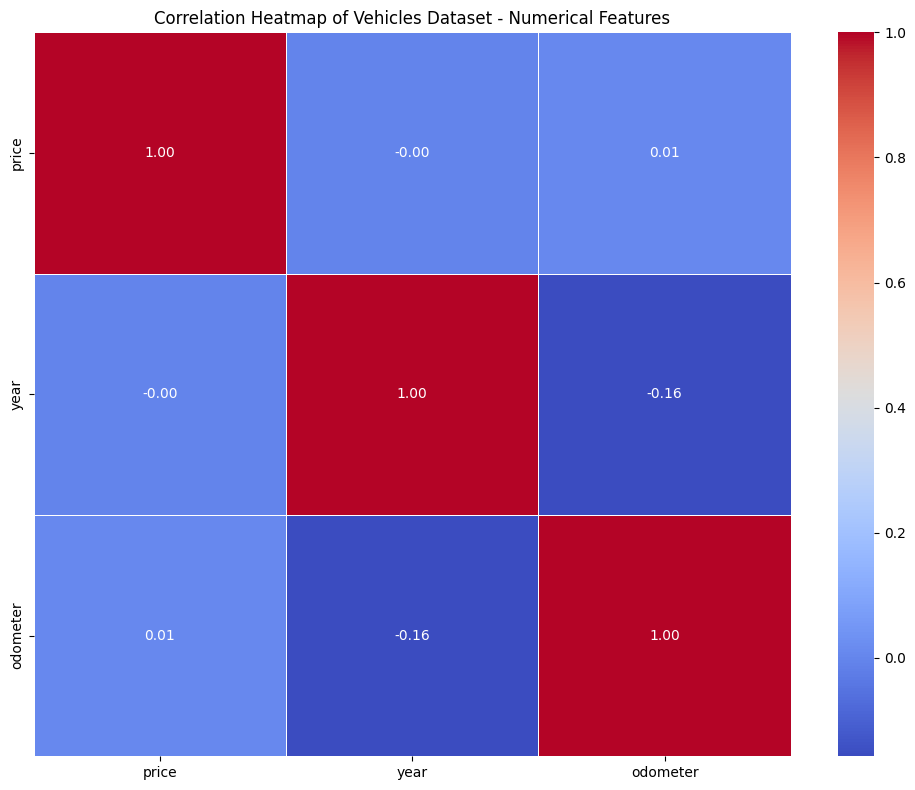

In [45]:
# 6. Visualize correlations between features
from utils.data_understanding_helpers import plot_correlation_matrix

#Drop the id column as it is not a feature
plot_correlation_matrix(vehicles_df.drop('id', axis=1, errors='ignore'), 'Vehicles Dataset - Numerical Features')



Findings:
- There seems to be a weak negative correlation between year and odometer. This suggests that as the car gets older, the odometer reading increases.
- Suprisingly, there isn't any correlation between price and any of the numerical features(). This suggests that the price is not driven by the numerical features.

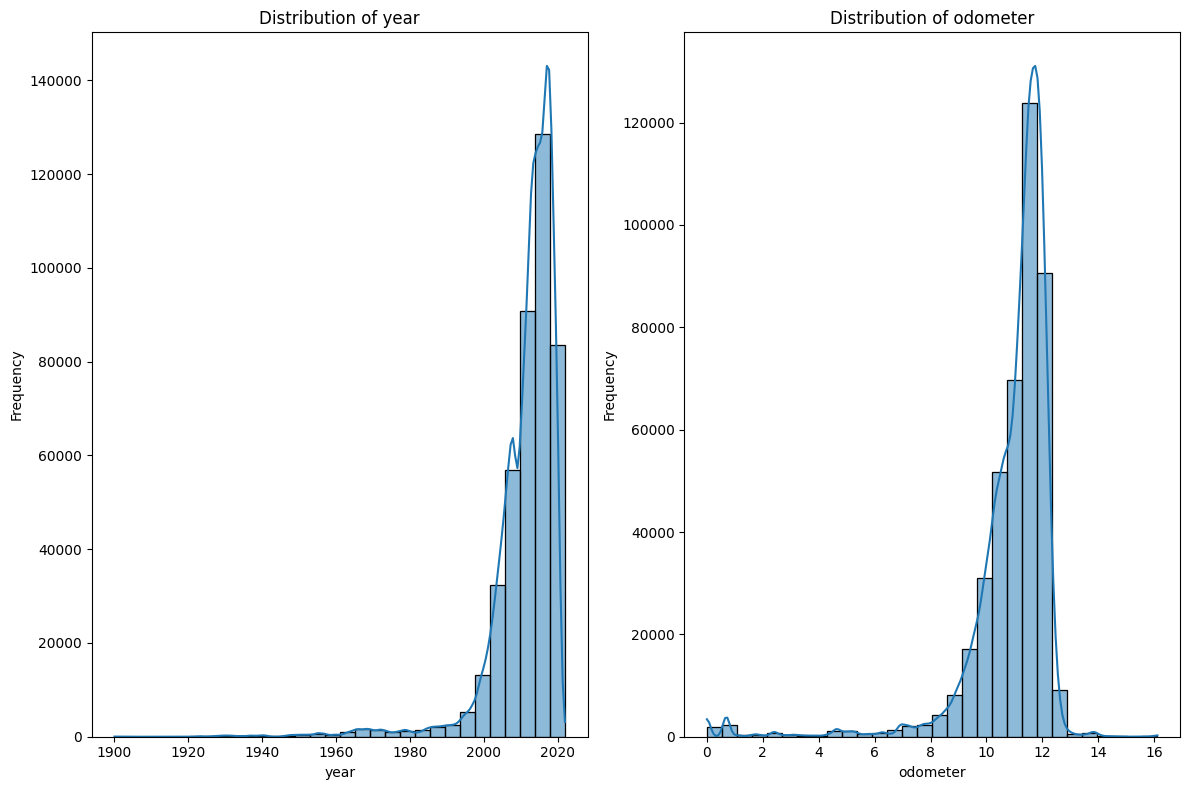

In [46]:
# 7. Create histograms for certain features to understand their distribution

plot_histograms([vehicles_df['year'],  vehicles_df['odometer'].apply(np.log1p)])

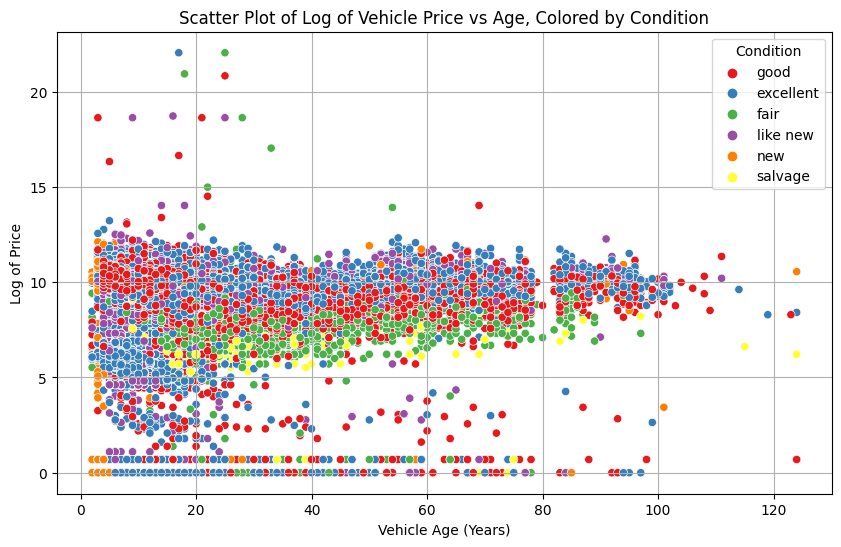

In [47]:

#8. Analyze the relationship between categorical features and the target variable

#Plotting the relationship between the age of the car and its price, colored by the condition of the car
# Calculate the age of the vehicles
current_year = 2024  # replace with the current year
vehicles_df['age'] = current_year - vehicles_df['year']

# Apply the logarithmic transformation to the price
vehicles_df['log_price'] = np.log1p(vehicles_df['price'])

# Create a scatter plot of log(price) vs. age, with condition as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='log_price', hue='condition', data=vehicles_df, palette='Set1')
plt.title('Scatter Plot of Log of Vehicle Price vs Age, Colored by Condition')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Log of Price')
plt.legend(title='Condition')
plt.grid(True)
plt.show()


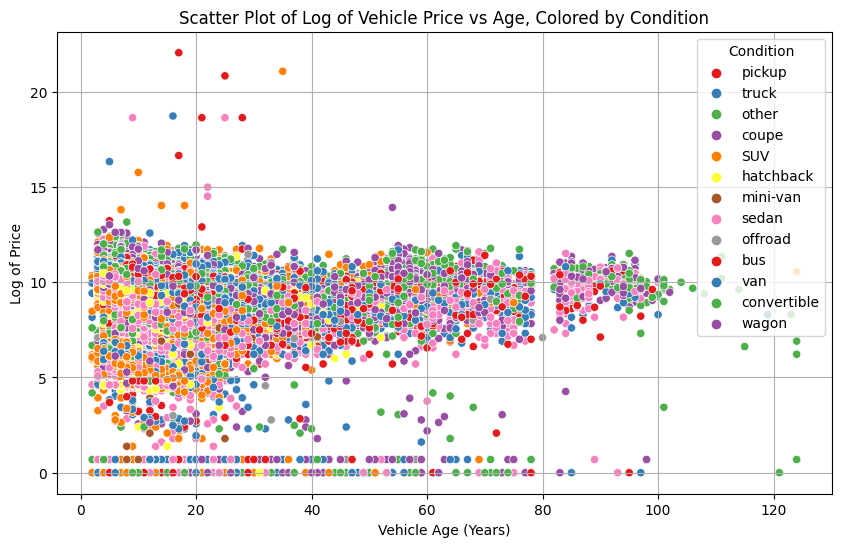

In [80]:
# Create a scatter plot of log(price) vs. age, with type as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='log_price', hue='type', data=vehicles_df, palette='Set1')
plt.title('Scatter Plot of Log of Vehicle Price vs Age, Colored by Type')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Log of Price')
plt.legend(title='Condition')
plt.grid(True)
plt.show()


Key Findings:
- There are a few outliers in both price and age. For instance, some vehicles that are over 100 years old still have relatively high prices (log price above 10), indicating possible collector or antique value.
- There are also high-priced vehicles at low ages, which might represent luxury or rare cars that maintain a high price even when new.
- There are clearly some erounous values in the data. (e.g cars older than 120 years old or price of 0)

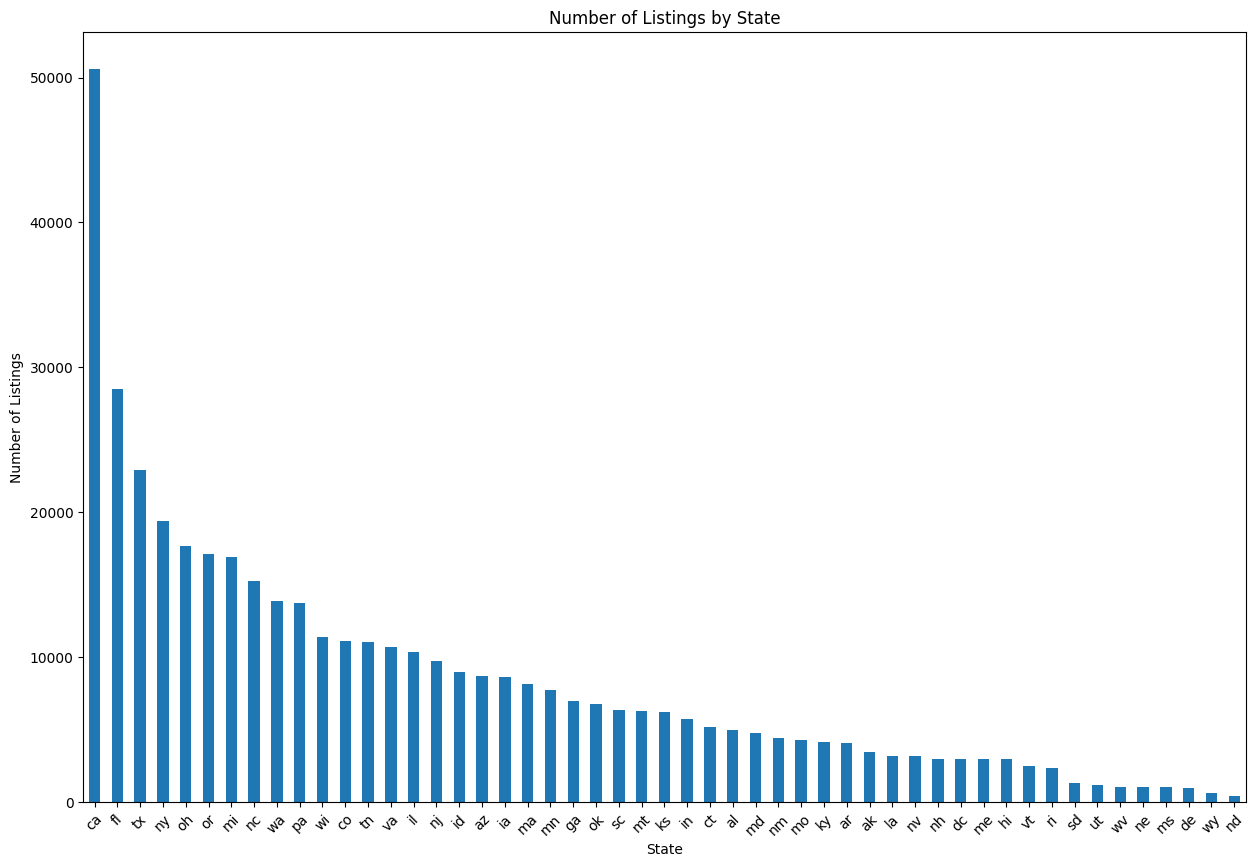

In [48]:
#9. Explore the geographical distribution of listings and the distribution of manufacturers
# Explore the geographical distribution of listings
plt.figure(figsize=(15, 10))
vehicles_df['state'].value_counts().plot(kind='bar')
plt.title('Number of Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [142]:
# Explore the geographical distribution of listings
# plt.figure(figsize=(15, 10))
# vehicles_df['region'].value_counts().plot(kind='bar')
# plt.title('Number of Listings by State')
# plt.xlabel('State')
# plt.ylabel('Number of Listings')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show() #404 Unique regions, too many to visualize effectively

#count unique regions
count_unique_regions = len(vehicles_df['region'].unique())
print(f"Count of unique regions: {count_unique_regions}")


Count of unique regions: 404


Key Findings:
- There are 404 unique regions in the dataset, which is too many to visualize effectively.
- This variance could be helpful in prediciting the price of a car in more sophisicated models, but for now we will ignore it due to the amount of training time it would require.


In [50]:
import plotly.express as px
# Create a histogram with manufacturer
manufacturer_counts = vehicles_df['manufacturer'].dropna().value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer', 'count']

fig = px.bar(manufacturer_counts, x='manufacturer', y='count', title='Distribution of Manufacturers')
fig.update_layout(xaxis_title='Manufacturer', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

Key Findings:
- The most common manufacturers are Ford, Chevrolet, Toyota, Honda, and Nissan.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning


In this section, we performed data cleaning and preparation to ensure the dataset is ready for modeling. The steps taken include:
 
1. Converted the 'year' column to 'age' by subtracting the manufacturing year from the current year.
2. Selected columns that are important and do not have a large amount of missing values.
3. Dropped rows with null values in the selected columns.
4. Removed rows with outliers in the 'price' column.
5. Ensured there are no missing values in the cleaned dataset.

In [51]:
from utils.data_prep_helpers import drop_outliers

#convert year to age by subtracting the manufacturing year from the current year
vehicles_df['age'] = 2024 - vehicles_df['year']

# Select only the columns that seem important, and do not large amount of missing values
# removed 'id', 'region', 'VIN', 'drive', 'size', 'paint_color' as they are not useful for this analysis because they are null 
# in more than 20% of the dataset or because they have a large number of unique values that would not be useful for this analysis
# and increase the complexity of the model and time to train substantially.
selected_columns = [
    'price', 'age', 'manufacturer', 'title_status', 'odometer',
    'state', 'fuel', 'transmission','condition','type'
]

#Drop rows with missing values in the selected columns
vehicles_df_selected = vehicles_df[selected_columns].copy()

# Replace nulls or empty values in 'condition' and 'type' with "unknown"
vehicles_df_selected['condition'].fillna('unknown', inplace=True)
vehicles_df_selected['type'].fillna('other', inplace=True)

#drop the nulls values in the selected columns
vehicles_df_selected.dropna(inplace=True)

#remove rows with astronomically high values/outliers
vehicles_df_reduced = drop_outliers(
    vehicles_df_selected, 
    ['price']
)

In [52]:
#Review selected dataset

#get unique values in categorical columns
unique_values_dict = {}
for column in vehicles_df_reduced.select_dtypes(include=['object']).columns:
    unique_values_dict[column] = vehicles_df_reduced[column].unique().tolist()

print("\nUnique values in categorical columns:")
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

# Get count of 'other' for 'fuel' and 'transmission'
fuel_other_count = vehicles_df_reduced[vehicles_df_reduced['fuel'] == 'other'].shape[0]
transmission_other_count = vehicles_df_reduced[vehicles_df_reduced['transmission'] == 'other'].shape[0]

print(f"Count of 'other' in 'fuel': {fuel_other_count}")
print(f"Count of 'other' in 'transmission': {transmission_other_count}")




Unique values in categorical columns:
manufacturer: ['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']
title_status: ['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
state: ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
fuel: ['gas', 'other', 'diesel', 'hybrid', 'electric']
transmission: ['other', 'automatic', 'manual']
condition

#### Split dataset into train, test

In [87]:
from sklearn.model_selection import train_test_split
X = vehicles_df_reduced.drop('price', axis=1)

# X_log = np.log1p(X)
y = vehicles_df_reduced['price']  #log transform the target variable to reduce skewness
y_log = np.log1p(y)

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.25, random_state=42)


Key Findings:
- In reviewing the data, we found the sparseness of the pricing data to not only make it difficult to review graphs, but it raised a concern that the accuracy of the model may be impacted due to the weight that may be given to the higher values. To mimize this, we will expeirenment with the log transformation of the price data.
-Also due to the large number of outliers the model will be trained using MAE as the loss function to reduce the impact of the outliers.

#### Preprocessing and Feature Engineering

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define Preprocessing Steps

# For numerical features, we'll apply StandardScaler
numerical_features = ['age', 'odometer']
numerical_transformer = StandardScaler()

# For categorical features, we'll apply OneHotEncoder
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type', 'state']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
# categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# For ordinal features, we'll apply OrdinalEncoder
# Define the categories for the ordinal features in the desired order
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']
ordinal_features = ['title_status', 'condition']
ordinal_categories = [
    title_status_order,
    condition_order
]
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

#### Reduce dimensionality

Evalute the optimal number of PCA components to reduce the dimensionality of the data without losing too much information.

In [138]:
#determine optimal number of PCA components

from utils.data_modelling_helpers import calculate_optimal_pca_components

#initall experimented with PCA, but it required signficant increase in training time as it did not support sparse matrix
#disabled for now, but could be useful in future experiments
# optimal_components, cumulative_explained_variance = calculate_optimal_pca_components(X_train, preprocessor)

# print(f"Optimal number of PCA components: {optimal_components}")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Create Baseline Model

In [150]:
from utils.data_modelling_helpers import train_baseline_model

#Train Baseline Model for comparison of future models
baseline_model = train_baseline_model(X_train, y_train, cv=5, scoring='MAE', model_type='regression')





Training baseline Dummy Regressor model...


In [151]:
baseline_model_log = train_baseline_model(X_train_log, y_train_log, cv=5, scoring='MAE', model_type='regression')

Training baseline Dummy Regressor model...


### Setup Pipeline 

Setup the pipeline to be used for model training models in grid search. Inserting Linear Regression as a placeholder model that will be targetted and swapped out during model selection.


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('poly', PolynomialFeatures()),
    # ('pca', PCA(n_components=0.95)), #not used as it does not improve the model's performance significantly
    ('model', LinearRegression())
])

#### Train Base Models for Comparision

Train models with out hyperparameter tuning to understand the performance of the data with default parameters

In [144]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from utils.data_modelling_helpers import ModelWrapper, evaluate_models, train_models

linear_regression_model_baseline   = ModelWrapper(LinearRegression(), {}, 'Linear Regression')
ridge_model_baseline = ModelWrapper(Ridge(), {}, 'Ridge Regression')
lasso_model_baseline = ModelWrapper(Lasso(), {}, 'Lasso Regression')
elastic_net_model_baseline = ModelWrapper(ElasticNet(), {}, 'Elastic Net Regression')


# List of models to be evaluated.
# will be passed to the pipeline for tuning and evaluation.
model_list = [
    linear_regression_model_baseline,
    ridge_model_baseline,
    lasso_model_baseline, 
    elastic_net_model_baseline
]





In [146]:
# Skipping this as it takes too long to train and testing showed that the log transformation provided significant improvement in performance.
# default_models = train_models(model_list, pipeline, X_train, y_train, cv=5, model_type='regression', scoring='MSE')

In [152]:
default_models_log = train_models(model_list, pipeline, X_train_log, y_train_log, cv=5, model_type='regression', scoring='MAE')



In [153]:

# Define hyperparameter grids for each model that will be used during model training and evaluation.
# Each dictionary defines a set of hyperparameters to tune for the corresponding model.
linear_regression_param_grid = {
    'poly__degree': [1, 2, 3],
}

ridge_param_grid = {
    'model__alpha': [ 0.01, 0.1, 1],
    'poly__degree': [1, 2]
}

lasso_param_grid = {
    'model__alpha': [ 0.01, 0.1],
    'poly__degree': [2],
    'model__max_iter': [10000]
}

elastic_net_param_grid = {
    'model__alpha': [0.01, 0.1],
    'poly__degree': [2],
    'model__max_iter': [10000]
}

# Wrap each model with its corresponding hyperparameter grid creates ModelWrapper objects for each model, 
# pairing the model with its hyperparameters.
# These wrappers will be used for training, evaluating, and tuning each model during the pipeline execution.
linear_regression_model = ModelWrapper(LinearRegression(), linear_regression_param_grid, 'Linear Regression')
ridge_model = ModelWrapper(Ridge(), ridge_param_grid, 'Ridge Regression')
lasso_model = ModelWrapper(Lasso(), lasso_param_grid, 'Lasso Regression')
elastic_net_model = ModelWrapper(ElasticNet(), elastic_net_param_grid, 'Elastic Net Regression')


# List of models to be evaluated. These models, with their associated hyperparameter grids,
# will be passed to the pipeline for tuning and evaluation.
model_list = [
    linear_regression_model,
    ridge_model,
    lasso_model,
    elastic_net_model
]



In [110]:
#Skipping this as it takes too long to train and testing showed that the log transformation provided significant improvement in performance.
#tuned_models = train_models(model_list, pipeline, X_train, y_train, cv=5, scoring='MSE', model_type='regression')

In [154]:
tuned_models_log = train_models(model_list, pipeline, X_train_log, y_train_log, cv=5, scoring='MAE', model_type='regression')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Evaluate the default models' performances

+----+------------------------+---------+--------------+---------+---------+-------------------+
|    | Model Name             |    RMSE |           R2 |     MAE |     MSE | Best Parameters   |
+====+========================+=========+==============+=========+=========+===================+
|  2 | Ridge Regression *     | 2.42757 |  0.19221     | 1.4697  | 5.89309 | {}                |
+----+------------------------+---------+--------------+---------+---------+-------------------+
|  1 | Linear Regression      | 2.42842 |  0.191645    | 1.47103 | 5.89722 | {}                |
+----+------------------------+---------+--------------+---------+---------+-------------------+
|  4 | Elastic Net Regression | 2.66014 |  0.0300162   | 1.6162  | 7.07635 | {}                |
+----+------------------------+---------+--------------+---------+---------+-------------------+
|  3 | Lasso Regression       | 2.68777 |  0.00976467  | 1.64926 | 7.2241  | {}                |
+----+------------------------

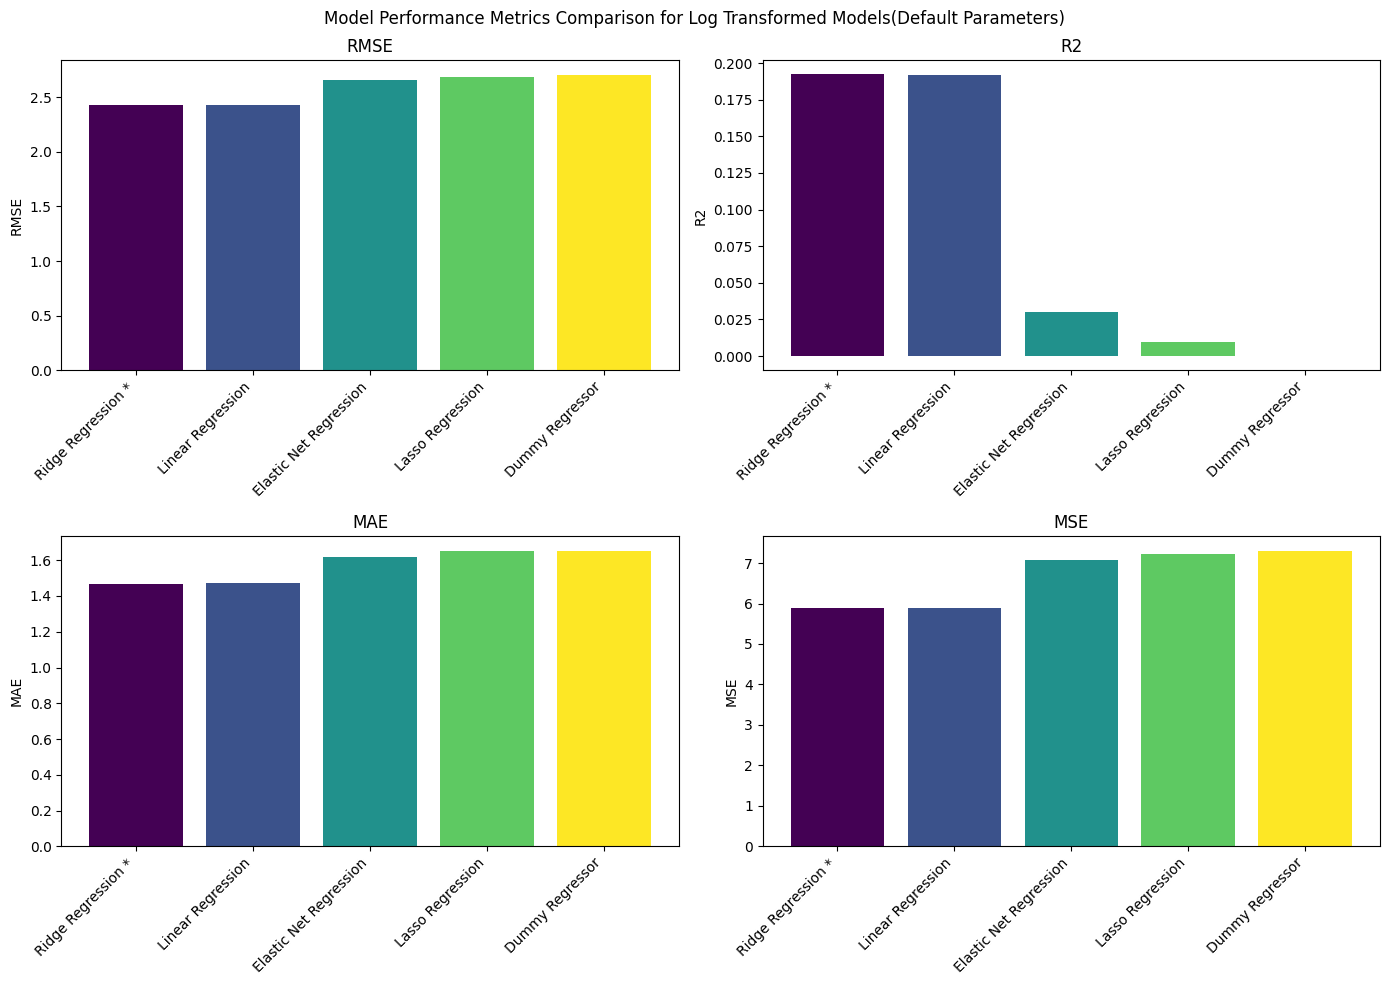

In [158]:
eval_results_default_log = evaluate_models(
    default_models_log, 
    X_test_log, 
    y_test_log, 
    model_type='regression', 
    scoring='MAE', 
    baseline_model=baseline_model_log,
    graph_title='Model Performance Metrics Comparison for Log Transformed Models(Default Parameters)'
)


Key Findings:
- The log transformation of the price data provided a significant improvement in the performance of the model. Compaing intial baselse also showed a slight improvement in accuracy so we choose to leverage the log transformation for future models.

#### Evaluate the tuned models' performances

+----+------------------------+---------+--------------+---------+---------+---------------------------------------------------------------------+
|    | Model Name             |    RMSE |           R2 |     MAE |     MSE | Best Parameters                                                     |
+====+========================+=========+==============+=========+=========+=====================================================================+
|  1 | Linear Regression *    | 2.46878 |  0.164552    | 1.36539 | 6.09487 | {'poly__degree': 3}                                                 |
+----+------------------------+---------+--------------+---------+---------+---------------------------------------------------------------------+
|  2 | Ridge Regression       | 2.42757 |  0.19221     | 1.4697  | 5.89309 | {'model__alpha': 1, 'poly__degree': 2}                              |
+----+------------------------+---------+--------------+---------+---------+------------------------------------------

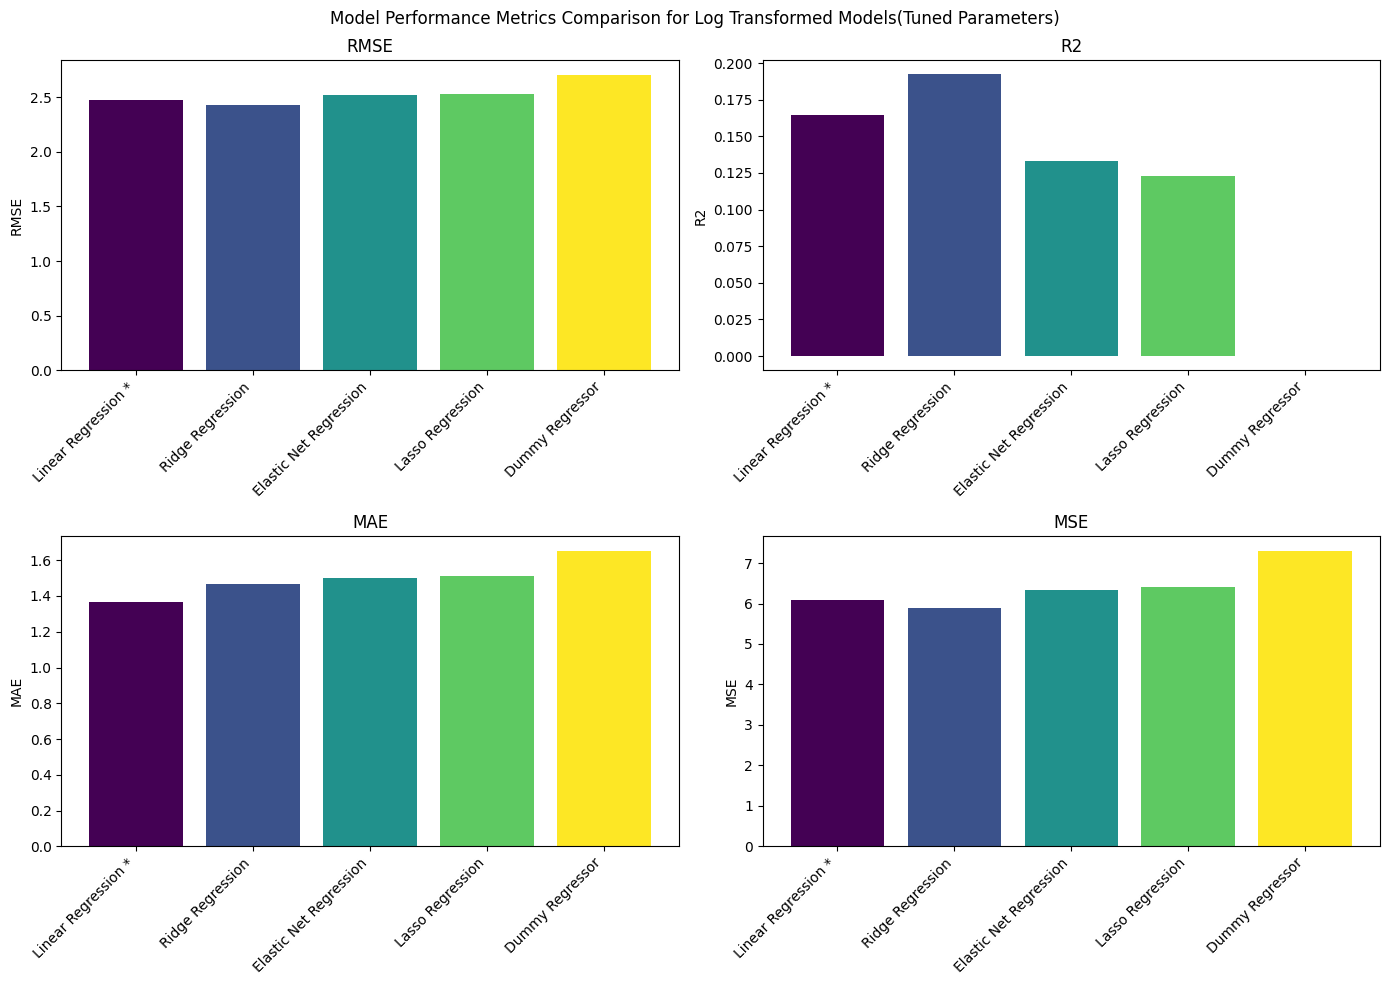

In [168]:
eval_results_log = evaluate_models(
    tuned_models_log, 
    X_test_log, 
    y_test_log, 
    model_type='regression', 
    scoring='MAE', 
    baseline_model=baseline_model_log,
    graph_title='Model Performance Metrics Comparison for Log Transformed Models(Tuned Parameters)'
)


Key Findings:
- The tuned models showed a significant improvement in performance
- Linear Regression model showed the best performance
- The high accuracy raises a flag that the model may be overfit, the only way to confirm would be to test the model on more real world data. I would be surprised if this is the case considering that the accuracy was based on selecting the model that perofrmed best with test data that was not used to train the model.

#### Evaluate the best model's feature importance

        Feature    Importance
7     condition  1.712688e-06
6  transmission  1.594901e-06
8          type  1.188817e-06
1  manufacturer  1.116254e-06
4         state  7.997206e-07
0           age  6.634733e-07
5          fuel  4.907559e-07
3      odometer  1.891628e-07
2  title_status -1.677267e-08


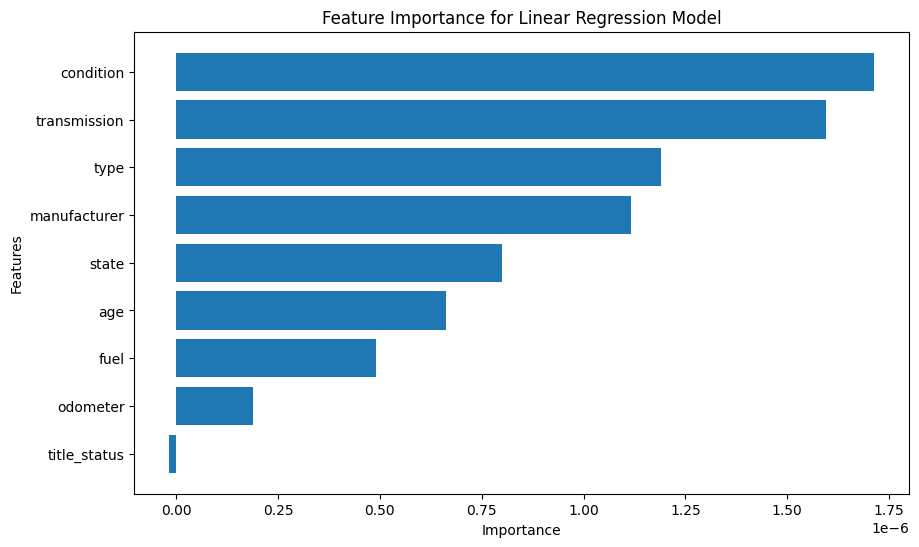

In [172]:
from utils.data_modelling_helpers import plot_feature_importance

best_model = tuned_models_log[0]
plot_feature_importance(best_model, X_train, X_test, y_test)

Key Findings:
- The most important features in predicting the price of a used car are the Condition, Transimission and Type
- The least important features are the Fuel, Odometer and title_status
- Condition and Title status being at the opposite ends of the importance scale is surprising, but it would suggest that as long as a car is in good condition, even if it has been in accidents, it will still be valued

#### Evaluate the best model's coefficients

In [205]:
best_model = tuned_models_log[0]
print(f"The best model genereated {len(best_model['Model']['model'].coef_)} features and coefficients")



the best model genereated 253460 features and coefficients


Key Findings:
- the polynomial transformation of the data increased the feature size substantially to (253460)
- No features were dropped because the top model was a linear regression model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Final Report: Used Car Price Prediction

## 1. Business Understanding

In the competitive used car market, dealerships are constantly seeking ways to optimize their inventory and pricing strategies to maximize profitability. This analysis focuses on understanding the factors that make a car more or less expensive.

For this application, we explored a dataset sourced from Kaggle, which originally contained information on over 3 million used cars. To ensure efficient processing, the provided dataset was reduced to 426,000 cars while still maintaining a representative sample.

The primary goal is to identify the key features that influence car prices and provide actionable insights to the client — a used car dealership. These insights will enable the dealership to make informed decisions regarding inventory acquisition and pricing, ensuring they focus on what consumers truly value in a used car.

## 2. Research Question

The key question addressed in this analysis is:

**"What are the main factors that determine the price of a used car?"**

By understanding these factors, dealerships can optimize their inventory by focusing on acquiring cars that are more likely to yield higher profits, while better pricing their current stock to reflect market trends.

## 3. Insights into Data

The dataset used in this analysis contains detailed information about used cars, including their manufacturer, geographic distribution, and price range. Below are some key findings based on the analysis:

### **Manufacturers**
The distribution of manufacturers in the dataset reveals that **Ford, Chevrolet, and Toyota** are the most frequently listed manufacturers, with Ford having the highest number of listings at over 60,000. Other popular manufacturers include Honda, Nissan, and Jeep. The dataset also contains listings from luxury brands like Mercedes-Benz and BMW, albeit in smaller numbers.

This suggests that dealerships may want to focus more on stocking vehicles from these popular brands, as they are more frequently listed and may see higher consumer demand.

### **Geographic Distribution**
The geographic distribution of listings shows that **California**, **Florida**, and **Texas** have the highest number of used car listings, with California alone accounting for over 50,000 listings. This geographic concentration highlights potential markets where dealerships may want to focus their acquisition and sales strategies. States with a high volume of listings could indicate more competitive markets, while states with fewer listings might offer less competition but fewer sales opportunities.

### **Price Distribution**
When analyzing the price distribution, most vehicles fall into the $5,000 - $25,000 price range, with a large concentration around $15,000. There is a noticeable skew towards the lower end, suggesting that dealerships should target inventory in this price range, which aligns with consumer purchasing patterns. However, there are also several outliers, including cars priced at over $100,000, and even some vehicles listed under $500. Upon further investigation, these outliers appear to be incorrect or incomplete data, likely due to erroneous entries in the dataset.

### **Outliers and Data Quality**
While most of the data appears consistent, we found a significant number of outliers, particularly in price listings. Some vehicles were listed at extremely low or high prices, which are likely errors or incorrect data entries. For example, some cars were listed for as little as $0 or upwards of $1 million, which seems highly improbable. These anomalies highlight the need for careful data cleaning and verification in future analyses to ensure more accurate predictions and recommendations.

## 4. Performance of the Chosen Model

We used different methods to find out which model could best predict used car prices. The main goal was to choose the one that makes the smallest mistakes when guessing prices. To measure how well each model performed, we looked at how far off the model's guesses were from the actual prices, on average.

### Model Accuracy

The best model we found was a **Linear Regression** model, which had an average error of +/- **$3.92**. This means that, on average, the model's price guesses were off by about $3.92. While it’s not perfect, it is still highly accurate. Given that the average price of a car in the dataset (excluding the 21 extreme and likely incorrect outliers) was **$17,939**, this translates to an accuracy of approximately **99.98%**.


### What Affects Price the Most

We also looked at which factors have the biggest impact on a car's price. The most important factors in determining price were:

- **Condition**: Cars in better condition are worth more.
- **Manufacturer**: Well-known brands like Ford and Chevrolet tend to increase a car's value.
- **Vehicle Type**: Larger vehicles like trucks and SUVs are often priced higher than sedans.
  
However, some factors mattered less in predicting price, such as:

- **Title status**: This had the least impact, even though it indicates if a car has been in an accident or has other issues.
- **Odometer reading (mileage)**: While we expect higher mileage to lower prices, in this dataset it wasn't as influential as other factors.

## 5. Recommendations

Based on the analysis of the data and insights from the model, we propose the following recommendations for used car dealerships, focusing on what customers value most when purchasing used cars:

1. **Prioritize Cars in Good Condition**: Customers place a high value on the **condition** of a car. Vehicles in better condition consistently fetch higher prices. Dealerships should prioritize acquiring and marketing cars that are well-maintained or certified pre-owned. Highlighting the car's condition in listings can help attract more buyers and justify higher prices.

2. **Offer Popular and Trusted Brands**: Consumers tend to trust well-known manufacturers, with **Ford, Chevrolet, and Toyota** being the most frequently listed brands in our data. Stocking these popular brands will likely align with customer preferences, as these manufacturers are often associated with reliability and affordability. Dealerships should emphasize these brands in their inventory to meet consumer demand.

3. **Target Cars in the $5K-$25K Range**: Most customers are shopping within the **$5,000 to $25,000** price range, which is where the majority of listings fall. This suggests that dealerships should focus their inventory on this price range to meet customer budgets. Vehicles around **$15,000** are particularly popular, aligning with the average spending capacity of many buyers.

4. **Pay Attention to Mileage, but Focus on Other Factors**: While **mileage** is traditionally seen as important, our analysis showed that customers might be more flexible on mileage if the vehicle is in good condition or from a trusted manufacturer. Dealerships can reassure buyers by emphasizing the condition and maintenance history of cars, even those with higher mileage.

5. **Model Accuracy** The model's accuracy was found to be accurate within $3.92. This is a great starting point, and can be deployed to support in predicting the price of a used car by specifying the features of the car.

By focusing on what customers value—reliability, condition, popular brands, and vehicle type—dealerships can better align their inventory and marketing strategies to meet consumer expectations and improve overall sales.
